   #                TELECOM CUSTOMER CHURN PREDICTION <br> ---------------------------------------------------------------------------------------------------------------
   
   

 ## Name : Samanvitha Pathi<br><br> UID : 209019 <br><br> Roll No. : 15 <br><br> -------------------------------------------------------------------------------------------------------------------------------------



#### In any business, to maximise number of customers,rather than attracting new customers it's also important to retain their existing customers.

#### OBJECTIVE : The project focusses on the behaviour of telecom customers who are likely to churn and predict if the customer leaves the company.

#### Dataset Source : https://www.kaggle.com/blastchar/telco-customer-churn  <br> <br>Originally this dataset is from IBM Watson Analytics community.


#### About dataset : <br><br>It has 7043 rows and 21 columns.<br><br>Customers who left within the last month – Churn<br><br>Customer Demographics  – gender, partners and dependents,senior citizen<br><br>Services that customers have signed up for – phone services, internet, online security, device protection, tech support & streaming services<br><br>Customer account information –tenure(in months), contract, payment method, paperless billing, monthly charges, and total charges

## PROJECT FLOW
### 1.Data Collection<br><br>2.Data Cleaning<br><br>3.Exploration <br><br>4.Encoding<br><br>5.Normalising data<br><br>6.Feature Selection<br><br>7.Splitting dataset<br><br>8.Building Models<br><br>9.Evaluating Model Performance<br><br>

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn import preprocessing  # for encoding
from sklearn.preprocessing import MinMaxScaler  # for normalising data
from sklearn.model_selection import train_test_split  # for splitting data into train and test
from sklearn.neighbors import KNeighborsClassifier  # for KNN classifier
from sklearn.naive_bayes import GaussianNB     # for Naive Bayes classifier
from sklearn.tree import DecisionTreeClassifier #for decision tree classifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.metrics import accuracy_score  # accuracy 
from sklearn.metrics import roc_auc_score,roc_curve  # for ROC curves

## Data Cleaning

In [4]:
telco=pd.read_csv("Dataset\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telco.shape

(7043, 21)

In [7]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
telco.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
# unique values of each column
telco.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Checking for missing values

In [10]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Converting Total Charges to numerical data type.
telco.TotalCharges = pd.to_numeric(telco.TotalCharges,errors='coerce') # errors='coerce' will replace non-numeric values like space in columns with object datatype to NaN
telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Since there are only 11 missing values in column 'TotalCharges' out of total 7043 data points, it's safe to drop the missing values

In [12]:
telco.dropna(inplace=True)

In [13]:
telco.shape

(7032, 21)

In [14]:
# Drop customerID as it's not required
telco=telco.drop(['customerID'],axis=1)

## Data Exploration & Visualisation

#### Churn rate

In [15]:
s=telco['Churn'].value_counts()
s

No     5163
Yes    1869
Name: Churn, dtype: int64

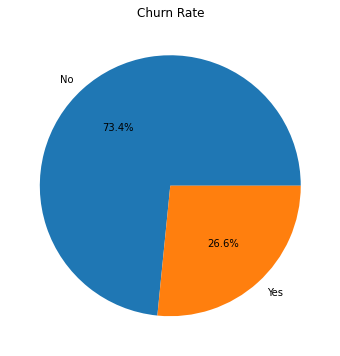

In [16]:
plt.figure(figsize = (6,6))
plt.pie(s,labels=['No','Yes'],autopct='%1.1f%%')
plt.title('Churn Rate')
plt.show()

#### Around 27% of the total customers have left the company.<br><br> Here, Churn is imbalanced. 



#### There are 18 categorical variables and 3 numeric variables . Let's analyze effect of each of these variables on churn .

### Categorical variables

### Demographic data & Churn

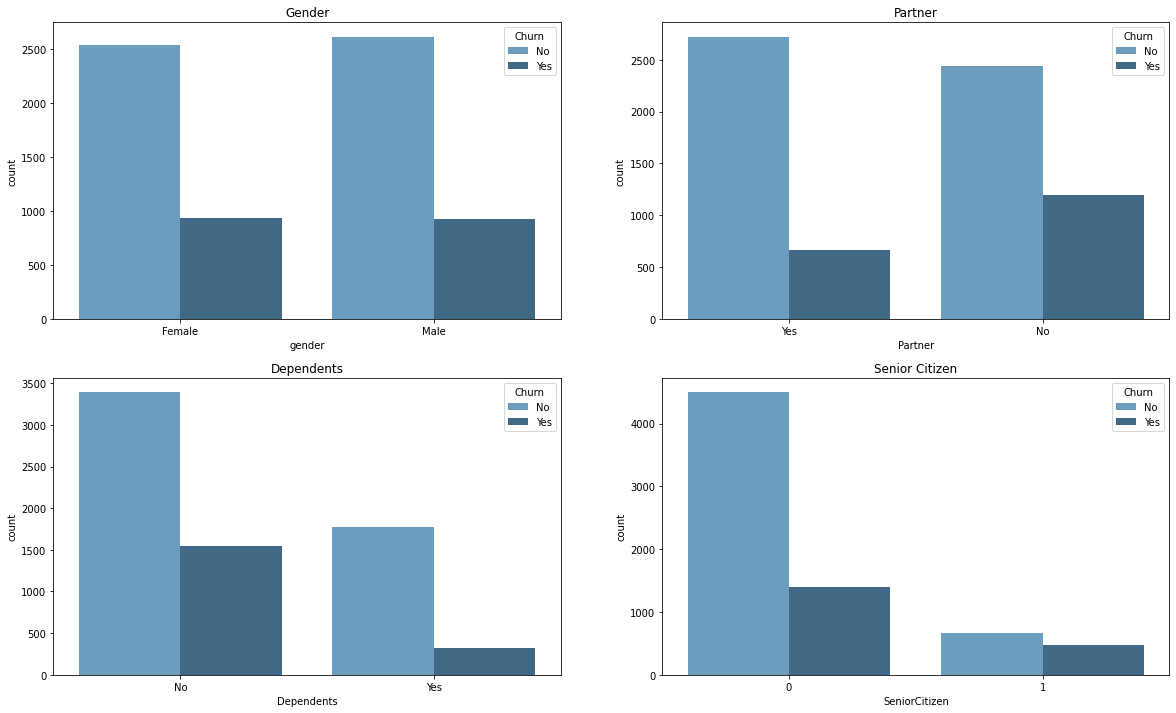

In [17]:
fig, axis = plt.subplots(2, 2, figsize=(20,12))
axis[0,0].set_title('Gender')
axis[0,1].set_title('Partner')
axis[1,0].set_title('Dependents')
axis[1,1].set_title('Senior Citizen')

sns.countplot(x = 'gender', hue = 'Churn', data = telco, palette = 'Blues_d',ax=axis[0,0])
sns.countplot(x = 'Partner', hue = 'Churn', data = telco, palette = 'Blues_d',ax=axis[0,1])
sns.countplot(x = 'Dependents', hue = 'Churn', data = telco, palette = 'Blues_d',ax=axis[1,0])
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = telco, palette = 'Blues_d',ax=axis[1,1])
plt.show()

#### 1. Gender doesn't affect Churn. <br> <br> 2. Customers having no partners are more likely to churn. <br> <br> 3. Customers having no dependents have left the company.<br><br> 4. Out of all senior citizens, most of them have left.


### Services & Churn

#### Phone Services

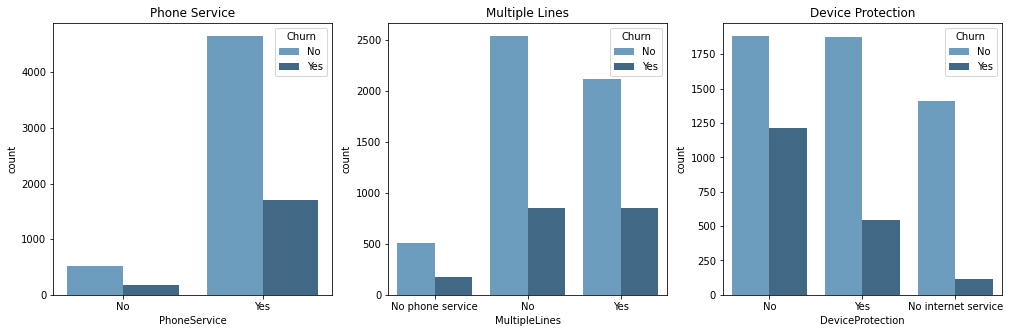

In [18]:
fig, axis = plt.subplots(1, 3, figsize=(17,5))
axis[0].set_title('Phone Service')
axis[1].set_title('Multiple Lines')
axis[2].set_title('Device Protection')

sns.countplot(x = 'PhoneService', hue = 'Churn', data = telco, palette = 'Blues_d',ax=axis[0])
sns.countplot(x = 'MultipleLines', hue = 'Churn', data = telco, palette = 'Blues_d',ax=axis[1])
sns.countplot(x = 'DeviceProtection', hue = 'Churn', data = telco, palette = 'Blues_d',ax=axis[2])
plt.show()

#### 1. Phone Services & having multiple phone lines doesn't seem to affect the churn.<br><br> 2. Customers who doesn't have device protection are more likey to churn

#### Internet Services

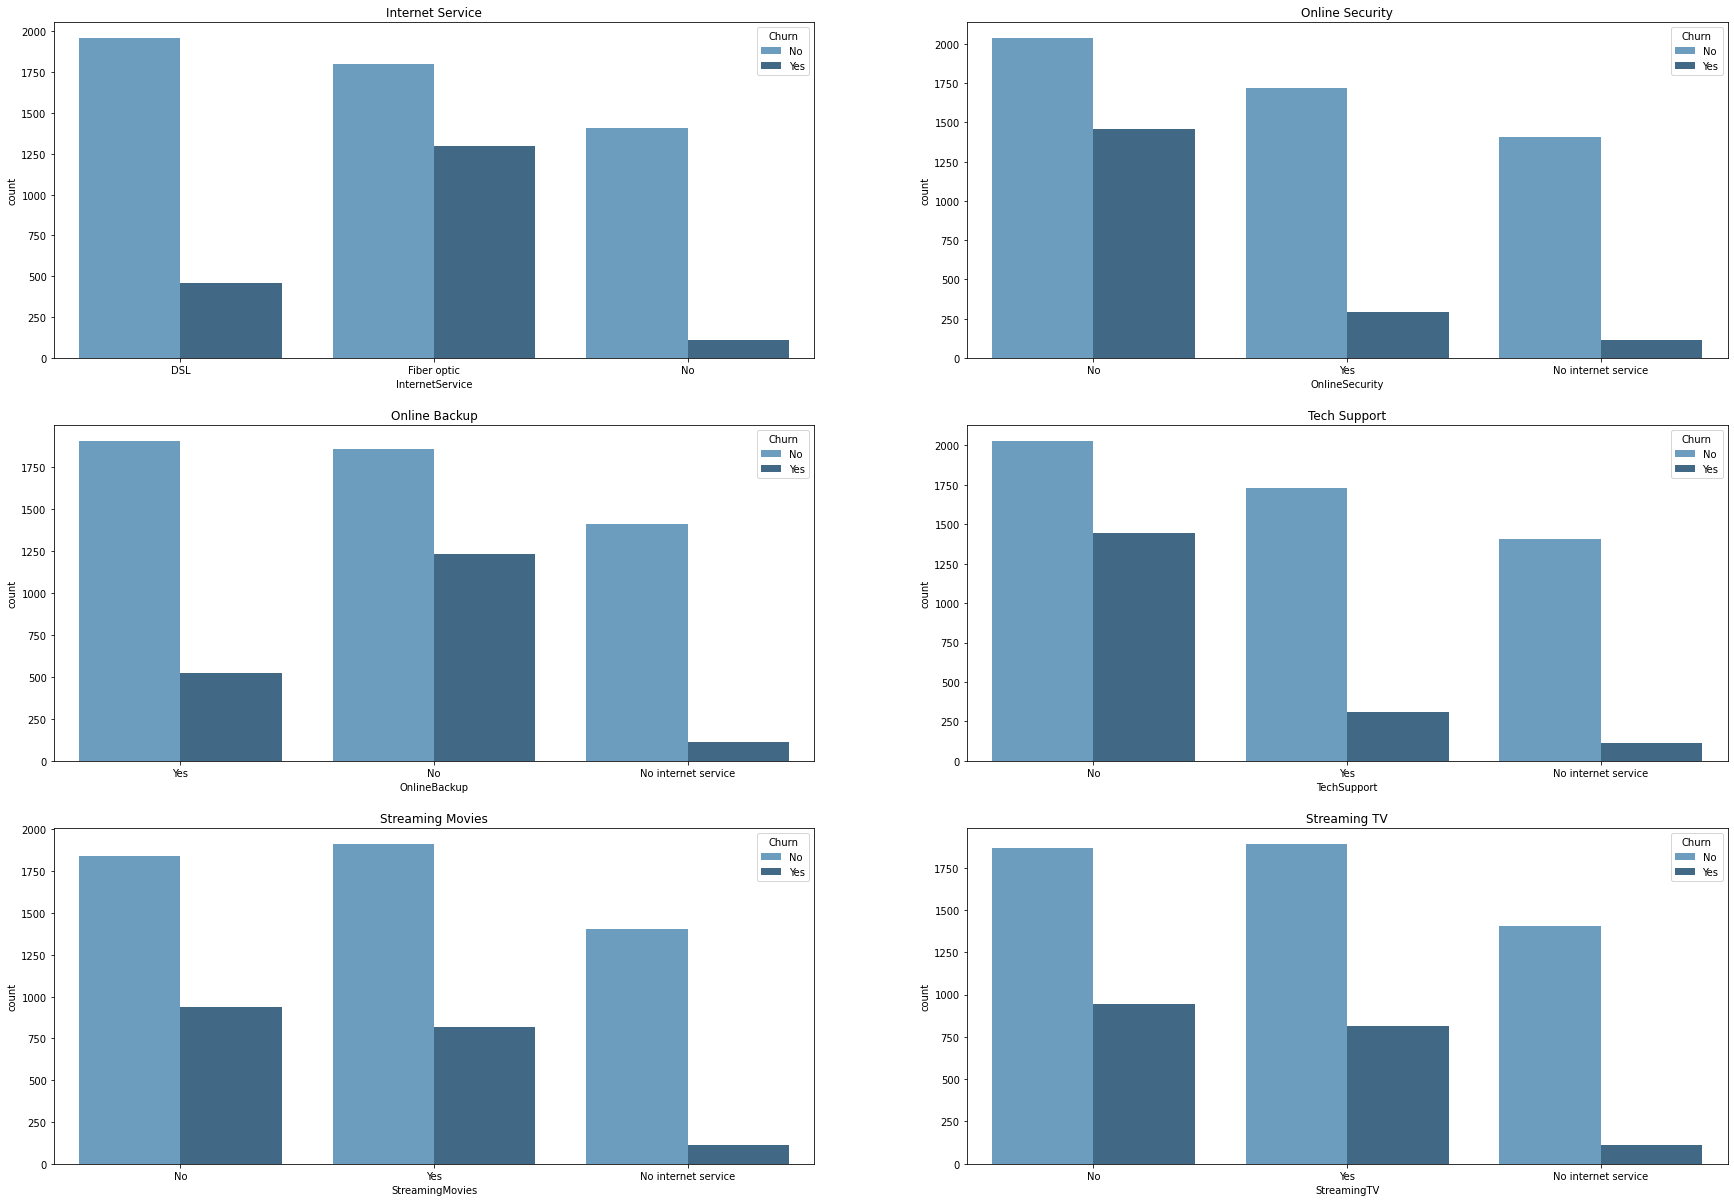

In [19]:
fig, axis = plt.subplots(3, 2, figsize=(30,21))
axis[0,0].set_title('Internet Service')
axis[0,1].set_title('Online Security')
axis[1,0].set_title('Online Backup')
axis[1,1].set_title('Tech Support')
axis[2,0].set_title('Streaming Movies')
axis[2,1].set_title('Streaming TV')

sns.countplot(x = 'InternetService', hue = 'Churn', data = telco, palette = 'Blues_d',ax=axis[0,0])
sns.countplot(x = 'OnlineSecurity', hue = 'Churn', data = telco, palette = 'Blues_d',ax=axis[0,1])
sns.countplot(x = 'OnlineBackup', hue = 'Churn', data = telco, palette = 'Blues_d',ax=axis[1,0])
sns.countplot(x = 'TechSupport', hue = 'Churn', data = telco, palette = 'Blues_d',ax=axis[1,1])
sns.countplot(x = 'StreamingMovies', hue = 'Churn', data = telco, palette = 'Blues_d',ax=axis[2,0])
sns.countplot(x = 'StreamingTV', hue = 'Churn', data = telco, palette = 'Blues_d',ax=axis[2,1])
plt.show()

#### 1. Customers who have taken fiber optic internet service are more likely to churn.<br><br>2. Customers who haven't utilised services like online security, online backup, tech support are probable to churn.<br><br>3. Streaming services doesn't affect the churn much

### Payment & Churn

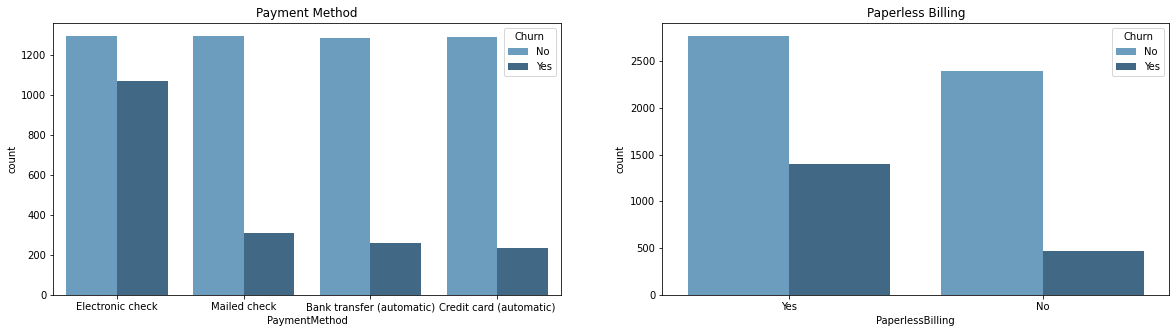

In [20]:
fig, axis = plt.subplots(1, 2, figsize=(20,5))
axis[0].set_title('Payment Method')
axis[1].set_title('Paperless Billing')

sns.countplot(x = 'PaymentMethod', hue = 'Churn', data = telco, palette = 'Blues_d',ax=axis[0])
sns.countplot(x = 'PaperlessBilling', hue = 'Churn', data = telco, palette = 'Blues_d',ax=axis[1])
plt.show()


#### 1. Most of the customers using electronic check have left whereas customers using cards and UPI are less likely to churn.<br><br>2. Customers using paperless billing are probable to churn. 

### Contract & Churn

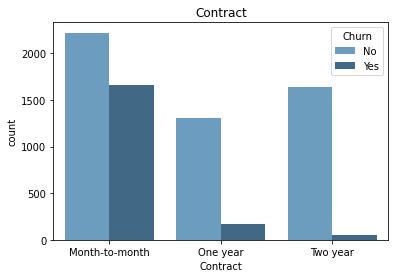

In [21]:
plt.title('Contract')
sns.countplot(x = 'Contract', hue = 'Churn', data = telco, palette = 'Blues_d')
plt.show()

#### Customers who have done contracts for short period are more likely to churn than that of long term contract customers.

### Numeric variables

### Tenure & Monthly Charges on Churn

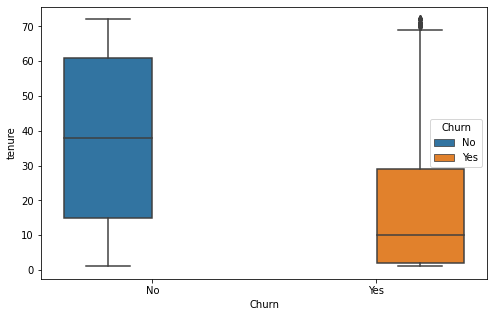

In [22]:
plt.figure(figsize = (8,5))
sns.boxplot(y='tenure',x='Churn',data=telco,hue='Churn')
plt.show()

#### Median of the tenure of customers who leave is low. Customers who just started to use their services are more likely to leave

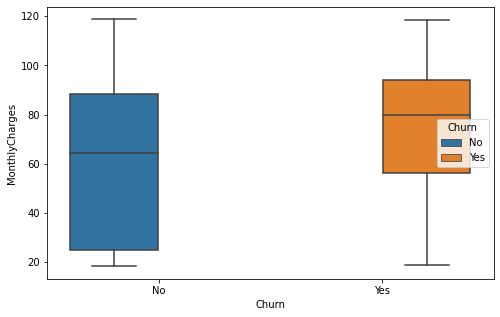

In [23]:
plt.figure(figsize = (8,5))
sns.boxplot(y='MonthlyCharges',x='Churn',data=telco,hue='Churn')
plt.show()

#### Median of the monthly charges of customers who leave is high. High monthly charges(charges between 70-100) are one of the reasons for customers to leave.

### Overall insights from EDA

#### 1. Senior Citizens and those who are not married are more likely to leave.<br><br>2. The company has to fix problems with fiber optic internet services.<br><br>3. Customers who leave the company mostly have a month-to-month payment, сustomers who have contract for 1-2 years almost do not leave the company.<br><br>4. Customers who use services by electronic check to pay are more likely to leave than others.

In [24]:
# Replacing few categorical variables as some columns have values like 'No phone service' and 'No'

In [25]:
telco = telco.replace(['No internet service'],'No')

In [26]:
telco = telco.replace(['No phone service'],'No')

### Label Encoding

In [27]:
#selects & converts all categoric columns to a list
categoric_cols = telco.select_dtypes(include = ['object']).columns.to_list()
numeric_cols = telco[['tenure','MonthlyCharges','TotalCharges']].columns.to_list()

In [28]:
#In 'OnlineSecurity' , 'OnlineBackup', 'Device protection', 'Tech Support', 'Streaming Services':
#     0 - No
#     1 - Yes
# In payment Method,
#     0 - Bank transfer
#     1 - Credit Card
#     2 - Electronic Check
#     3 - Mailed Check
# In churn
#     0 - No
#     1 - Yes

In [29]:
label_encoder = preprocessing.LabelEncoder()
for i in categoric_cols:
    telco[i]= label_encoder.fit_transform(telco[i])
    
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Scaling

In [30]:
minmax=MinMaxScaler()
scaler= minmax.fit(telco[numeric_cols])
telco[numeric_cols]=scaler.transform(telco[numeric_cols])
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,0,0,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,0,0,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


### Correlation

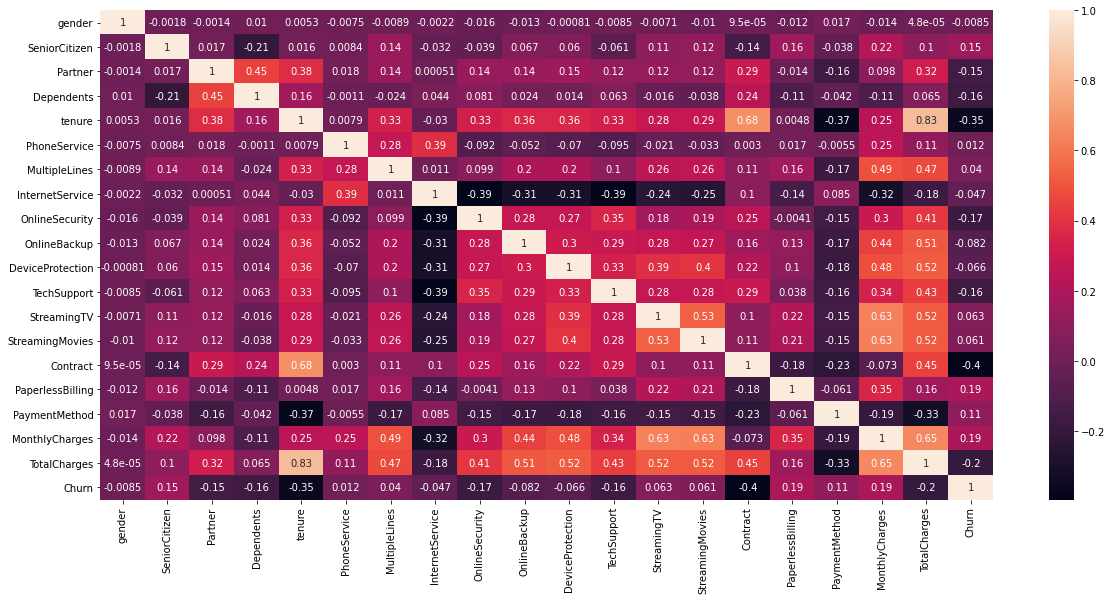

In [31]:
plt.figure(figsize=(20,9))
c=telco.corr()
sns.heatmap(c,annot=True)
plt.show()

### Feature Selection

In [32]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # statistical measure chi2 value to get score for each feature

X=telco.drop("Churn",axis=1) #all feature variables
y=telco["Churn"] #target variable
selector=SelectKBest(chi2,k='all')
sf_fit=selector.fit(X,y)
#print feature scores
for i in range(len(sf_fit.scores_)):
    print(telco.columns[i],";",sf_fit.scores_[i])

gender ; 0.2542970616723691
SeniorCitizen ; 133.4827656170315
Partner ; 81.8577693882184
Dependents ; 131.2715092077862
tenure ; 238.00756934460105
PhoneService ; 0.09294838905266173
MultipleLines ; 6.51465136381442
InternetService ; 9.715269302629721
OnlineSecurity ; 147.16560110987498
OnlineBackup ; 31.209831753313438
DeviceProtection ; 20.216007005217485
TechSupport ; 135.43960166442906
StreamingTV ; 17.320614803413584
StreamingMovies ; 15.930611071238824
Contract ; 1111.7590543469473
PaperlessBilling ; 104.97922422047361
PaymentMethod ; 59.24050679933937
MonthlyCharges ; 50.60023312923719
TotalCharges ; 73.25848580221185


C:\Users\Samanvitha Pathi\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


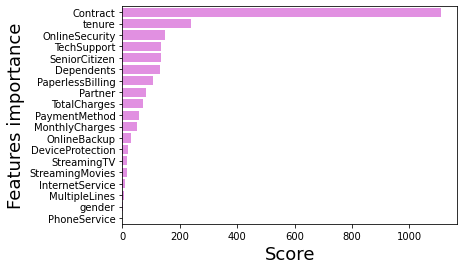

In [33]:
import seaborn as sns
import pandas as pd

dataset=pd.DataFrame()
dataset['Feature']=X.columns[range(len(sf_fit.scores_))]
dataset['Scores']=sf_fit.scores_
dataset=dataset.sort_values(by='Scores',ascending=False)
sns.barplot(dataset['Scores'],dataset['Feature'],color='violet')
plt.ylabel('Features importance',fontsize=18)
plt.xlabel('Score',fontsize=18)
plt.show()

In [34]:
# selecting only best 13 columns
bestcols=SelectKBest(chi2,k=13).fit(X,y)
X_new=bestcols.fit_transform(X, y)
X_new.shape

(7032, 13)

In [35]:
X=X_new

### Splitting into training & test data

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## Models

<AxesSubplot:>

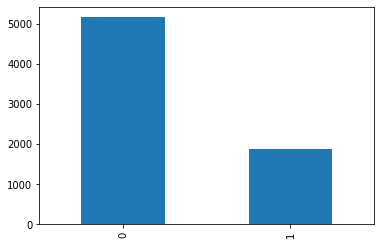

In [37]:
telco['Churn'].value_counts().plot(kind='bar')

#### This is an imbalanced classification problem.

### Naive Bayes

In [38]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)
NB_predict=NBmodel.predict(X_test)

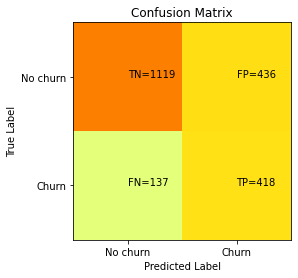

In [39]:
# visualising confusion matrix
cm1=confusion_matrix(y_test,NB_predict)
plt.clf()
plt.imshow(cm1,cmap=plt.cm.Wistia)  #cmap is color map
classnames=['No churn','Churn']
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks=np.arange(len(classnames))
plt.xticks(tick_marks,classnames) #rotation=45
plt.yticks(tick_marks,classnames)
s=[['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"="+str(cm1[i][j])) #putting the text at position(j,i) on matrix
plt.show()

In [40]:
print("accuracy: {}%".format(round(accuracy_score(y_test, NB_predict)*100,2)))

from sklearn.metrics import precision_score
print("Precision : {}".format(precision_score(y_test,NB_predict)))

from sklearn.metrics import recall_score
print("Recall : {}".format(recall_score(y_test,NB_predict)))

from sklearn.metrics import f1_score
print("F1 score: {}".format(f1_score(y_test,NB_predict)))

accuracy: 72.84%
Precision : 0.4894613583138173
Recall : 0.7531531531531531
F1 score: 0.5933286018452804


In [41]:
# For ROC (Receiver Operating Characteristic)
fpr1,tpr1,thresholds1=roc_curve(y_test,NBmodel.predict_proba(X_test)[:,1])
NB_roc_auc=roc_auc_score(y_test,NBmodel.predict(X_test))
NB_roc_auc

0.7363836505315604

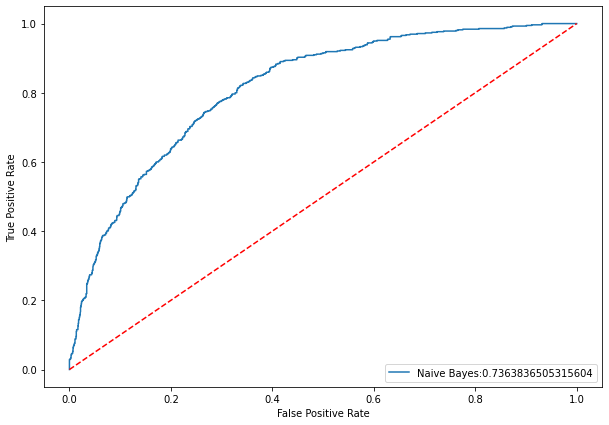

In [42]:
plt.figure(figsize=(10,7))
plt.plot(fpr1,tpr1,label=f'Naive Bayes:{NB_roc_auc}')
plt.plot([0,1],[0,1],'r--') #r-- is for red dashed line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### KNN

In [43]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)
KNN_predict=knn.predict(X_test)
#print(KNN_predict)

In [44]:
print("accuracy: {}%".format(round(accuracy_score(y_test, KNN_predict)*100,2)))

from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,KNN_predict)))

from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,KNN_predict)))

from sklearn.metrics import f1_score
print("F1 : {}".format(f1_score(y_test,KNN_predict)))

accuracy: 77.91%
Precision score: 0.6057007125890737
Recall score: 0.4594594594594595
F1 : 0.5225409836065574


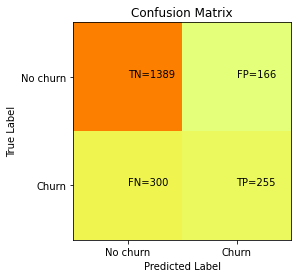

In [45]:
# visualising confusion matrix
plt.clf()
cm2=confusion_matrix(y_test,KNN_predict)
plt.imshow(cm2,cmap=plt.cm.Wistia)  #cmap is color map
classnames=['No churn','Churn']
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks=np.arange(len(classnames))
plt.xticks(tick_marks,classnames) #rotation=45
plt.yticks(tick_marks,classnames)
s=[['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"="+str(cm2[i][j])) #putting the text at position(j,i) on matrix
plt.show()

In [46]:
# For ROC
fpr2,tpr2,thresholds2=roc_curve(y_test,knn.predict_proba(X_test)[:,1])
KNN_roc_auc=roc_auc_score(y_test,knn.predict(X_test))
KNN_roc_auc

0.6763535239419484

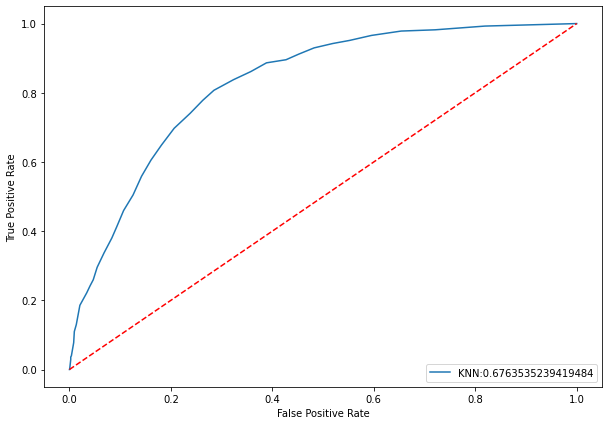

In [47]:
plt.figure(figsize=(10,7))
plt.plot(fpr2,tpr2,label=f'KNN:{KNN_roc_auc}')
plt.plot([0,1],[0,1],'r--') #r-- is for red dashed line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [48]:
# Random forest model with 110 decision trees
RF_model = RandomForestClassifier(n_estimators=110,bootstrap = True,
                               max_features = 'sqrt') 
                               
# Fitting on training data
RF_model.fit(X_train, y_train)
#class predictions
RF_predict = RF_model.predict(X_test)

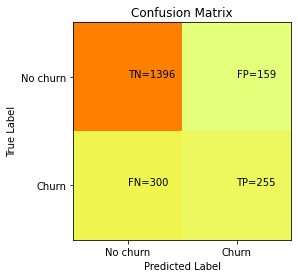

In [49]:
# visualising confusion matrix
plt.clf()
cm4=confusion_matrix(y_test,RF_predict)
plt.imshow(cm4,cmap=plt.cm.Wistia)  #cmap is color map
classnames=['No churn','Churn']
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks=np.arange(len(classnames))
plt.xticks(tick_marks,classnames) #rotation=45
plt.yticks(tick_marks,classnames)
s=[['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"="+str(cm4[i][j])) #putting the text at position(j,i) on matrix
plt.show()

In [50]:
print("accuracy: {}%".format(round(accuracy_score(y_test, RF_predict)*100,2)))

from sklearn.metrics import precision_score
print("Precision : {}".format(precision_score(y_test,RF_predict)))

from sklearn.metrics import recall_score
print("Recall : {}".format(recall_score(y_test,RF_predict)))

from sklearn.metrics import f1_score
print("F1 score: {}".format(f1_score(y_test,RF_predict)))

accuracy: 78.25%
Precision : 0.6159420289855072
Recall : 0.4594594594594595
F1 score: 0.5263157894736842


In [51]:
# For ROC
fpr3,tpr3,thresholds3=roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
RF_roc_auc=roc_auc_score(y_test,RF_model.predict(X_test))
RF_roc_auc

0.6786043278004693

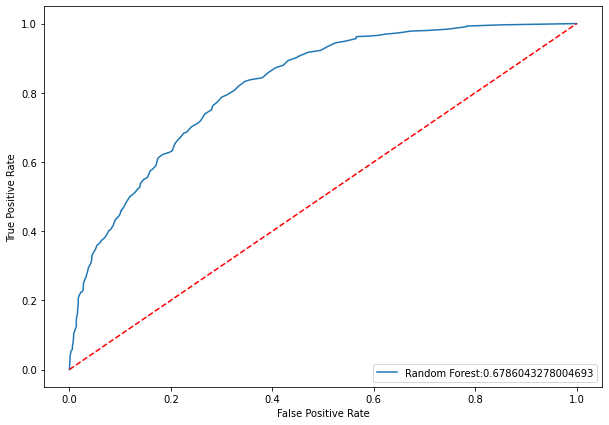

In [54]:
plt.figure(figsize=(10,7))
plt.plot(fpr3,tpr3,label=f'Random Forest:{RF_roc_auc}')
plt.plot([0,1],[0,1],'r--') #r-- is for red dashed line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

 ### Model Summary

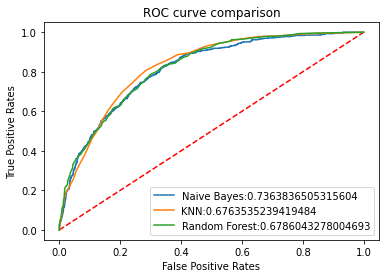

In [53]:
plt.plot([0,1],[0,1], 'r--')
plt.plot(fpr1, tpr1, label= f'Naive Bayes:{NB_roc_auc}')
plt.plot(fpr2, tpr2, label= f'KNN:{KNN_roc_auc}')
plt.plot(fpr3, tpr3, label= f'Random Forest:{RF_roc_auc}')

plt.legend()
plt.xlabel("False Positive Rates")
plt.ylabel("True Positive Rates")
plt.title('ROC curve comparison')
plt.show()

#### Since the distribution of churn is imbalanced, accuracy is not appropriate to evaluate and thus ROC curve would be considered for the evaluation of the model. <br><br>ROC- AUC is a measure of performance ranging from 0(worst) to 1(best). The more ROC-AUC score, the better the model.<br><br> Above plot shows that Naive bayes model has slightly higher AUC score than the other models. 


#### Recall is also considered here as False Negatives are more concerned in this case. It would be a serious problem to the company if false negatives are high.<br><br> Recall of 3 models: <br><br> 1. Naive Bayes : 75 % <br><br> 2. KNN : 46 % <br><br> 3. Random Forest : 47%

#### Since Naive Bayes model has high recall score and better AUC score, it is considered as better model comparatively.





# <br>
# <br>-----------------------------------------------------------------------------------------------------------
# Name : Samanvitha Pathi                  <br><br>                                       UID : 209019 <br><br> Roll No. : 15
